# TV Shows on Streaming Services

<a class="anchor" id="top"></a>

1. [Introduction](#intro)
2. [The Data](#data) <br>
    2.1 [Cleaning and Exploration](#cleaning) <br>
3. [Analysis](#analysis) <br>
    3.1 [Release Dates](#release) <br>
    3.2 [Age Demographics](#age) <br>
    3.3 [Rotten Tomatoes Scores](#rt) <br>
4. [Conclusion](#conclusion)

[Back to Top](#top)
<a class="anchor" id="intro"></a>

## Introduction

"The Streaming Wars" is the name for the constant back and forth battle of content providers to draw subscribers to their respective streaming services, avialible for a monthly fee with no cable required. There are seemingly an endless number of services, and the content avaliable on them is constantly in flux as contracts end, corporations merge, and user demand ebbs/flows. Some services focus on a niche genre to draw a small but devoted fan base willing to pay for a monthly subscription (Crunchyroll for anime fans, ESPN+ for sports fans, and many many more). Other services are going for broad appeal and try to have content aimed at all audiences. In 2022, there are four services (Netflix, Disney+, Prime Video, Hulu) that stand above the rest in subscriber count and cultural significance, and understanding the content avaliable on these sites is helpful in findinglarger trends in consumer patterns for cord cutters around the world.

#### The Streaming Sites
1. **Netflix**- launched as a DVD rental service through the mail in 1997 before pivoting to becoming exclusively a streaming site with 220 million users in 2022.
2. **Hulu**- launched in 2007 primaily as a service for streaming ABC, Freeform, and FX network shows. Disney aquired a majority stake in Hulu in 2019, and its current user base in 2022 is 46 million users
3. **Prime Video**- Amazon's streaming service offered to all 200 million Amazon Prime subscribers, and primarily shows original content
4. **Disney+**- The most recent streaming service, launched in 2019. It houses Disney orifinal shows/movies, including franchises owned by Walt Disney Studios such as Marvel, Star Wars, and Pixar. It has approximately 150 million users in 2022.


[Back to Top](#top)
<a class="anchor" id="data"></a>
## The Data


#### Data source
The data used in this analysis is sourced from [kaggle.com](#https://www.kaggle.com/datasets/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney), and is the result of a internet data scrape of the TV shows avaliable on the 4 major streaming services as of 2021. Every entry in the dataset is present on at least one site, but some shows may be avaliable on multiple sites.

####  Columns
* **ID**: Unique movie/TV show ID
* **Title**: Title
* **Year**: The year in which the movie or TV show was produced
* **Age**: Target age group
* **IMDb**: IMDb score
* **Rotten Tomatoes**: Rotten Tomatoes score
* **Netflix**: Whether the movie/show is found on Netflix
* **Hulu**: Whether the movie/show is found on Hulu
* **Prime Video**: Whether the movie/show is found on Prime Video
* **Disney+**: Whether the movie/show is found on Disney+
* **Type**: Movie or TV shpw (0 for movie, 1 for TV show)



<a class="anchor" id="cleaning"></a>
### Cleaning and Exploration

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

We'll import the data into a drataframe, and preview the first/last 5 rows

In [2]:
# Load data
tv = pd.read_csv('tv_shows.csv', index_col = 0)
tv

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5363,5713,Paradise Islands,2017,NaN,NaN,10/100,0,0,0,1,1
5364,5714,Mexico Untamed,2018,NaN,NaN,10/100,0,0,0,1,1
5365,5715,Wild Centeral America,2020,NaN,NaN,10/100,0,0,0,1,1
5366,5716,Wild Russia,2018,NaN,NaN,10/100,0,0,0,1,1


We can see that we have a total of 5368 TV shows, and that we are only missing values in the age and imdb ratings category. 

In [3]:
tv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5368 entries, 0 to 5367
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               5368 non-null   int64 
 1   Title            5368 non-null   object
 2   Year             5368 non-null   int64 
 3   Age              3241 non-null   object
 4   IMDb             4406 non-null   object
 5   Rotten Tomatoes  5368 non-null   object
 6   Netflix          5368 non-null   int64 
 7   Hulu             5368 non-null   int64 
 8   Prime Video      5368 non-null   int64 
 9   Disney+          5368 non-null   int64 
 10  Type             5368 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 503.2+ KB


We also can see that totals for each platform. Unsuprisingly, Netflix (the largest streamer by subscribers, and the earliest success story) has the most shows at 1971 while the newest streamer (Disney+) has the fewest shows at 351.

In [43]:
tv[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum(axis=0).sort_values(ascending=False)

Netflix        1971
Prime Video    1831
Hulu           1621
Disney+         351
dtype: int64

The Rotten Tomatoes scores and IMDb scores come as a string in the format of "xx/xx" (out of 100 for RT and 10 for IMDb). To make these entries into numbers that we can analyze/visualize, we need to convert those strings into just a single number.

In [4]:
# Convert Rotten Tomatoes and IMDb xx/xx string scores to a single number
tv['Rotten Tomatoes'] = tv['Rotten Tomatoes'].str.split('/').str[0].astype('int') 
tv['IMDb'] = tv['IMDb'].str.split('/').str[0].astype('float')

Since we'll be making charts for each streaming service, it's helpful to make separate dataframes for all 4 sites at the beginning to simplify the code later on.

In [5]:
# Creating dataframes for each streaming service
netflix = tv[tv['Netflix'] == 1]
disney = tv[tv['Disney+'] == 1]
hulu = tv[tv['Hulu'] == 1]
prime = tv[tv['Prime Video'] == 1]

[Back to Top](#top)
<a class="anchor" id="analysis"></a>
## 3. Analysis

<a class="anchor" id="release"></a>
### 3.1 Release Years
What are the release years of the shows on each platform?


We can chart the total number of shows released in each year (starting with 2000 for the sake of simplicity/relevance). We can see that 2017 was the peak year with over 500 shows being released, and a slow decline until 2020 before a large drop in 2021 (likely due to shows taking some time to make their way onto streaming services and also COVID reducing the number of new shows in production).

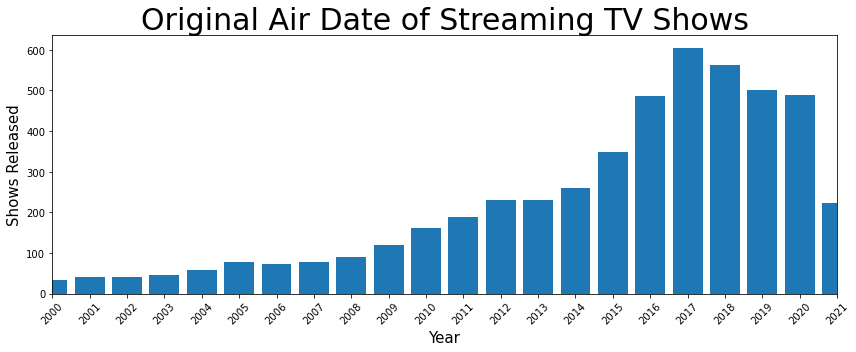

In [47]:
plt.figure(figsize = (12,5))

# All releases counted by year
total_releases = tv['Year'].value_counts().sort_index()

# Create the bar chart
plt.bar(x = total_releases.index, height = total_releases.values)
plt.xlim(2000, 2021)
plt.xticks(list(range(2000,2022)), rotation = 45)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Shows Released', fontsize = 15)
plt.title('Original Air Date of Streaming TV Shows', fontsize = 30)
plt.tight_layout()

If we want to break down the shows by streaming service, we can create a similar graph for all 4 streamers.

We see that in all 4 streamers, they steadily increate the releases until they peak in the late 2010's, and decline until the present day. Netflix, Disney+, and Prime Video have significantly more shows from the late 2010's than they do in the years leading up, while Hulu has a more even distribution of releases from the entirety of the 2010's. 

Also, Prime Video has the steepest dropoff of newer shows (show's released in the last 5 years) than any of the other streamers.

In [48]:
# number of releases per year
netflix_releases = netflix['Year'].value_counts().sort_index()
disney_releases = disney['Year'].value_counts().sort_index()
hulu_releases = hulu['Year'].value_counts().sort_index()
prime_releases = prime['Year'].value_counts().sort_index()

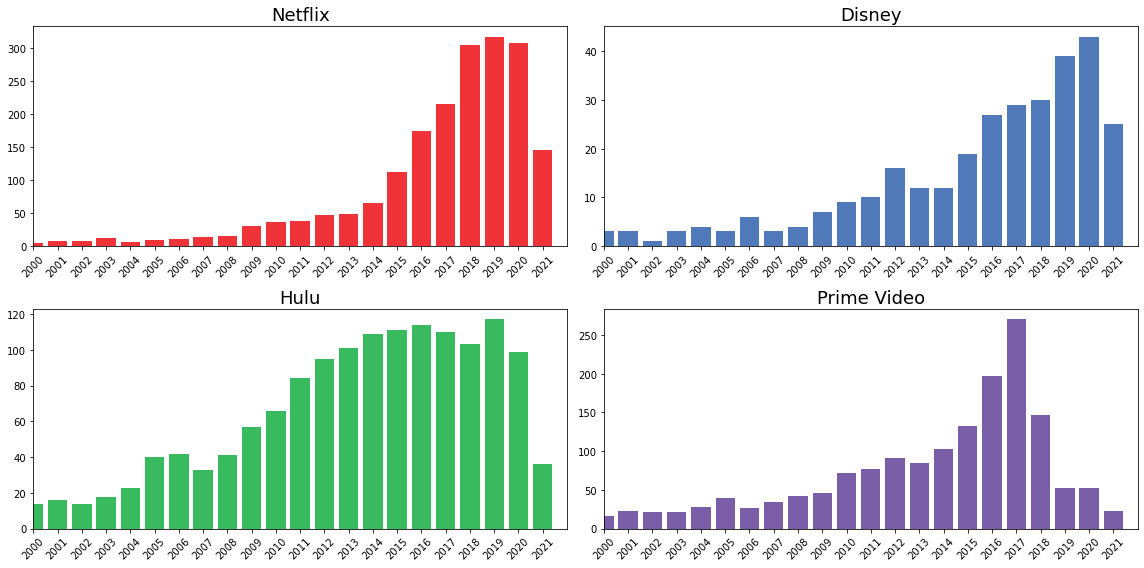

In [33]:
# Create figure
plt.figure(figsize = (16,8))

# x-axis goes from 2000 to 2021
custom_ticks = list(range(2000,2022))
custom_xlim = (2000,2022)

# Netflix plot
ax = plt.subplot(2,2,1) # all subplots will share this ones x-axis
plt.bar(x = netflix_releases.index, height = netflix_releases.values, color = '#ef3339')
plt.title('Netflix', fontsize = 18)
plt.xlim(custom_xlim)
plt.xticks(custom_ticks, rotation = 45)

# Disney Plot
plt.subplot(2,2,2, sharex = ax)
plt.bar(x = disney_releases.index, height = disney_releases.values, color = '#5079ba')
plt.title('Disney', fontsize = 18)
plt.xticks(custom_ticks, rotation = 45)

#Hulu Plot
plt.subplot(2,2,3, sharex = ax)
plt.bar(x = hulu_releases.index, height = hulu_releases.values, color = '#39ba5e')
plt.title('Hulu', fontsize = 18)
plt.xticks(custom_ticks, rotation = 45)

# Prime Video Plot
plt.subplot(2,2,4, sharex = ax)
plt.bar(x = prime_releases.index, height = prime_releases.values, color = '#7a5ea8')
plt.title('Prime Video', fontsize = 18)
plt.xticks(custom_ticks, rotation = 45)

plt.tight_layout()

[Back to Top](#top)
<a class="anchor" id="age"></a>
### 3.2 Streaming Apps Age Demographics

What ages are the shows on each streaming service intended for?

The age demographics of the streaming service can be rated for one of the following age groups:
* all
* 7+
* 13+
* 16+
* 28+

Overall, 16+ is the most common rating, followed by 18+, 7+, all, and 13+.

We see that in the entire dataframe, only 9 shows are rated 13+, so we'll drop that rating for the purpose of graphing to decrease clutter.

In [49]:
tv['Age'].value_counts()

16+    995
18+    854
7+     831
all    552
13+      9
Name: Age, dtype: int64

Perhaps unsurpringly, Disney+ (which dedicates a sizable portin of its library to family friendly content) has the largest share of shows rated all (49% of its total libray). Conversely, Hulu has the least number of family friendly shows, with only 10% of its library rated for all ages.

On the other hand, Netflix and Disney+ has the highest share of shows rated for 18+, with 36% and 42% of the library respectively having more mature content only rated for adults.

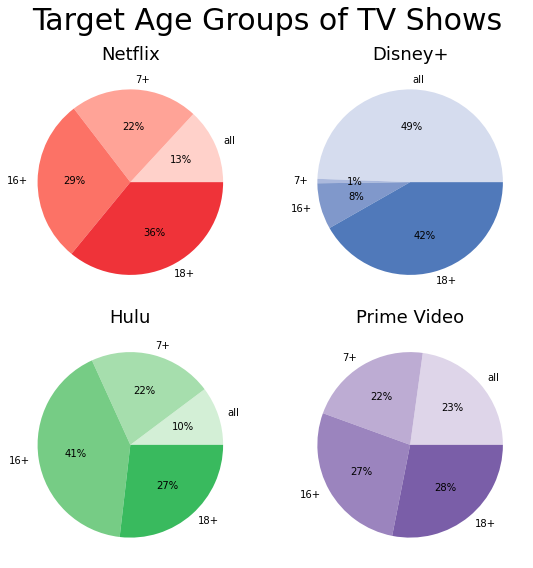

In [8]:
# create age group counts and sort so all charts have the same order
netflix_ages = netflix['Age'].value_counts().drop('13+').reindex(['all','7+', '16+', '18+']).values
disney_ages = disney['Age'].value_counts().reindex(['all','18+', '16+', '7+']).values
hulu_ages = hulu['Age'].value_counts().drop('13+').reindex(['all','18+', '16+', '7+']).values
prime_ages = prime['Age'].value_counts().drop('13+').reindex(['all','18+', '16+', '7+']).values

# create section labels
names = ['all', '7+', '16+', '18+']
red_palette = ['#ffd1ca', '#ffa397', '#fc7266', '#ef3339']
blue_palette = ['#d5dcee', '#abb9dd', '#8098cb', '#5079ba']
green_palette = ['#d3efd6', '#a6dead', '#76cc85', '#39ba5e']
purple_palette = ['#ded5e9', '#bdacd3', '#9b84be', '#7a5ea8']


# create master plot
plt.figure(figsize=(8,8))
plt.suptitle('Target Age Groups of TV Shows', fontsize = 30)

# netflix plot
plt.subplot(2,2,1)
plt.pie(netflix_ages, labels = names, autopct = '%1.0f%%', colors = red_palette)
plt.title('Netflix', fontsize = 18)

# disney plot
plt.subplot(2,2,2)
plt.pie(disney_ages, labels = names, autopct = '%1.0f%%', colors = blue_palette)
plt.title('Disney+', fontsize = 18)

# hulu plot
plt.subplot(2,2,3)
plt.pie(hulu_ages, labels = names, autopct = '%1.0f%%', colors = green_palette)
plt.title('Hulu', fontsize = 18)

# prime plot
plt.subplot(2,2,4)
plt.pie(prime_ages, labels = names, autopct = '%1.0f%%', colors = purple_palette)
plt.title('Prime Video', fontsize = 18)

plt.tight_layout()

[Back to Top](#top)
<a class="anchor" id="rt"></a>
### 3.3 Rotten Tomatoes scores

What are the Rotten Tomatoes critic scores for each streaming service?

The online film and television site Rotten Tomatoes is commonly used by consumers to determine whether a show is worth investing time into, and therefore the scores (while an imperfect metric) are nonetheless helpful in determining if a streaming service is a good value for a consumer.

We see that the average critic score is 47%, with the interquartile faling between 36% and 60%. The lowest score is a 10%, and the highest score of 100% belonging to two shows (Breaking Bad on Netflix and Rick and Morty on Hulu).

In [62]:
tv['Rotten Tomatoes'].describe()

count    5368.000000
mean       47.220380
std        19.555753
min        10.000000
25%        36.000000
50%        48.000000
75%        60.000000
max       100.000000
Name: Rotten Tomatoes, dtype: float64

In [63]:
tv[tv['Rotten Tomatoes']==100]

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Breaking Bad,2008,18+,9.4,100,1,0,0,0,1
1950,1960,Rick and Morty,2013,18+,9.2,100,0,1,0,0,1


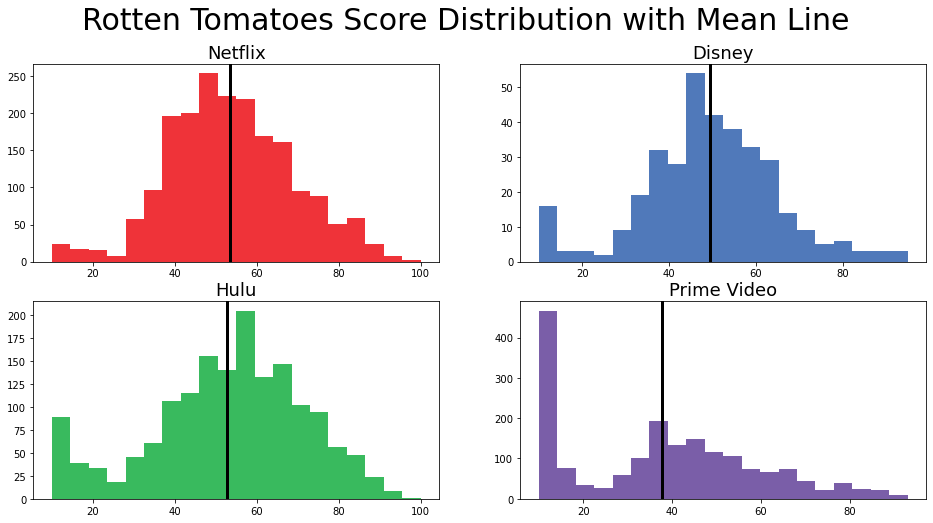

In [35]:
# Create overall figure
plt.figure(figsize = (16,8))
plt.suptitle('Rotten Tomatoes Score Distribution with Mean Line', fontsize = 30)

# Rotten Tomatoes score for every streamer (integer 1 to 100)
netflix_scores = netflix['Rotten Tomatoes']
disney_scores = disney['Rotten Tomatoes']
hulu_scores = hulu['Rotten Tomatoes']
prime_scores = prime['Rotten Tomatoes']

#Netflix plot
plt.subplot(2,2,1)
plt.hist(netflix_scores, color = '#ef3339', bins = 20)
plt.axvline(netflix_scores.mean(), color = 'black', linewidth = 3)
plt.title('Netflix', fontsize = 18)

#Disney plot
plt.subplot(2,2,2)
plt.hist(disney_scores, color = '#5079ba', bins = 20)
plt.axvline(disney_scores.mean(), color = 'black', linewidth = 3)
plt.title('Disney', fontsize = 18)

#Hulu plot
plt.subplot(2,2,3)
plt.hist(hulu_scores, color = '#39ba5e', bins = 20)
plt.axvline(hulu_scores.mean(), color = 'black', linewidth = 3)
plt.title('Hulu', fontsize = 18)

#Prime plot
plt.subplot(2,2,4)
plt.hist(prime_scores, color = '#7a5ea8', bins = 20)
plt.axvline(prime_scores.mean(), color = 'black', linewidth = 3)
plt.title('Prime Video', fontsize = 18)

plt.show()

We can see that Netflix, Disney+, and Hulu have an above average RT score, while Amazon is far below the average with only 37% critic approval.

I found the large number of shows in the low ratings for Prime really interesting. There were 271 shows with a rating of 10/100, and another 135 rated 13/100.

In [64]:
prime['Rotten Tomatoes'].mean()

37.76133260513381

In [56]:
prime['Rotten Tomatoes'].value_counts()

10    271
13    135
14     61
38     49
36     43
     ... 
84      3
22      2
75      2
93      2
91      1
Name: Rotten Tomatoes, Length: 80, dtype: int64

When I previewed some of the low ratings, none of the titles jumped out as particularly well known shows, so it seems like Prime really does just have a lot of obscure titles that the critics did not receive very well. 

In [55]:
prime[prime['Rotten Tomatoes'] == 10]

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
4786,5105,The Hunters Club,2014,NaN,NaN,10,0,0,1,0,1
4787,5106,Travel the Road,2016,NaN,NaN,10,0,0,1,0,1
4788,5107,Pinkfong! Bedtime Lullabies,2015,NaN,NaN,10,0,0,1,0,1
4789,5108,The Union Series,2016,NaN,NaN,10,0,0,1,0,1
4790,5109,Another Dirty Room,2016,NaN,NaN,10,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5052,5371,Breakfast with Bevan,2013,NaN,NaN,10,0,0,1,0,1
5053,5372,"Gas, Grub, and Ghosts",2017,NaN,NaN,10,0,0,1,0,1
5054,5373,Extreme Constructions,2017,NaN,NaN,10,0,0,1,0,1
5055,5374,Nature's Treasure Islands,2014,NaN,NaN,10,0,0,1,0,1


[Back to Top](#top)
<a class="anchor" id="conclusion"></a>
## Conclusion

The "Streaming Wars" have only intensifiedas more and more consumers do away with traditional cable services and as the COVID-19 Pandemic has driven households to look for entertainment from the comfort of their own homes.

Streamers are spending billions to try to outdo each other. In 2022, Hulu made history by being the first streaming service to exlucusvely release the Academy Award winner for Best Picture with CODA. Disney+ and HBO Max continue to pit their mammoth franchises of Marvel and D.C. superheroes against each other, and Disney+ has spent the last 3 years creating a shared universe of films and TV shows inside their Marvel and Star Wars franchises. 

September 2022 saw the release of the most expensive streaming show ever made as Prime Video releases the Rings of Power show based off J.R.R. Tolkien's Lord of the Rings books, which cost over $500 million, and pits itself against HBO Max's Game of Thrones spinoff House of the Dragon in the battle to become the next big watercooler franchise show on television.